### Done by : BEJAOUI Ahmed - DABGHI Aymen - GHARBI Mohamed Rostom - JERIDI Salma - MEJRI Aymen

In [1]:
import itertools
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import tabulate
from IPython.display import HTML, display

sns.set()

%matplotlib inline

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

## Loading Data :

In [2]:
train = pd.read_csv('train.csv')

/home/mejri/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
store = pd.read_csv('store.csv')

## Merging data : 

In [4]:
merged_data = pd.merge(store, train, on='Store', how='inner')

## EDA and statistical analysis

### Store type analysis :

In [5]:
merged_data['SalesperCustomer'] = merged_data['Sales']/merged_data['Customers']

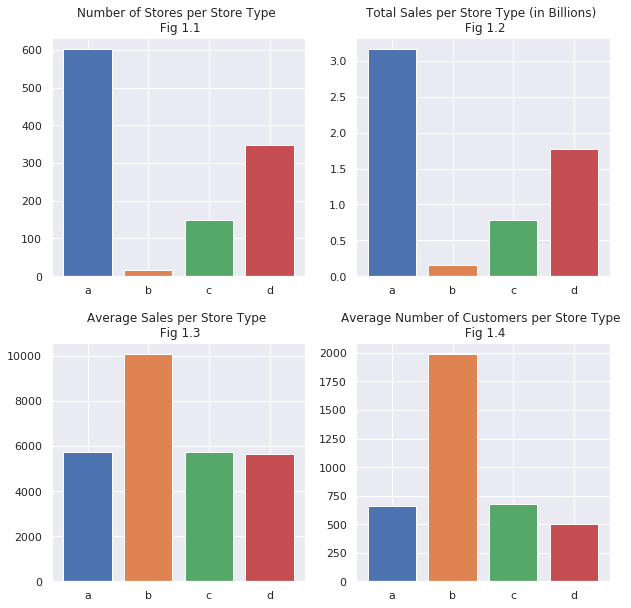

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace=0.28)
# axes[1].merged_data.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0, 0].bar(store.groupby(by="StoreType").count().Store.index, store.groupby(
    by="StoreType").count().Store, color=[next(palette), next(palette), next(palette), next(palette)])
axes[0, 0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0, 1].bar(merged_data.groupby(by="StoreType").sum().Sales.index, merged_data.groupby(
    by="StoreType").sum().Sales/1e9, color=[next(palette), next(palette), next(palette), next(palette)])
axes[0, 1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[1, 0].bar(merged_data.groupby(by="StoreType").sum().Customers.index, merged_data.groupby(
    by="StoreType").Sales.mean(), color=[next(palette), next(palette), next(palette), next(palette)])
axes[1, 0].set_title("Average Sales per Store Type \n Fig 1.3")
axes[1, 1].bar(merged_data.groupby(by="StoreType").sum().Customers.index, merged_data.groupby(
    by="StoreType").Customers.mean(), color=[next(palette), next(palette), next(palette), next(palette)])
axes[1, 1].set_title("Average Number of Customers per Store Type \n Fig 1.4")
plt.show()

**Insights:**
* Figure 1.1 and Figure 1.2 show that Type A stores are more present on the market and have a significantly higher turnover than other types of stores.

* We can see Figures 1.3 and 1.4 that despite the low presence of type B stores on the market, the performance of their stores is superior to that of others; they have average turnover and a higher average number of customers.

* According to these two observations we can predict that the type B stores are hypermarkets which justifies the low presence and the high number of customers and that the type A stores are supermarkets which certainly, are quite widespread but which have not the same figure as B stores


### Assortment analysis:

Text(0.5,1,'Number of Different Assortments per Store Type \n Fig 2.2')

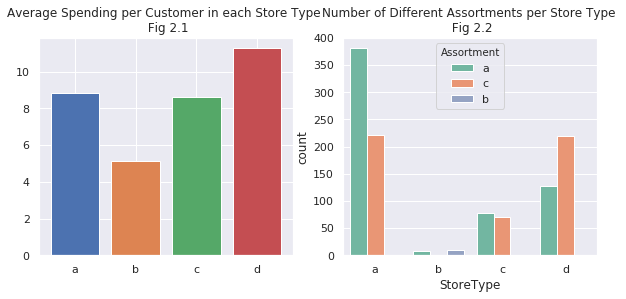

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(merged_data.groupby(by="StoreType").sum().Sales.index, merged_data.groupby(
    by="StoreType").SalesperCustomer.mean(), color=[next(palette), next(palette), next(palette), next(palette)])
axes[0].set_title(
    "Average Spending per Customer in each Store Type \n Fig 2.1")
axes[1] = sns.countplot(x="StoreType", hue="Assortment", order=["a", "b", "c", "d"], data=store, palette=sns.color_palette(
    "Set2", n_colors=3))
axes[1].set_title("Number of Different Assortments per Store Type \n Fig 2.2")

**Insight :**
* We can see from Figure 2.1 that the assumption we made about the type of store is well verified since store B sells all types of items.

* We note that customers in type D stores tend to pay more than in other stores, these amounts are due to to the fact that type d stores concentrate their sales on items c.

### How Promotion affect the overall sales ?

In [8]:
train = train.drop(train[(train.Open == 0) & (train.Sales == 0)].index)

In [9]:
train.reset_index(drop=True, inplace=True)

In [10]:
data = pd.merge(train, store, how='left', on='Store')

In [11]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month']=data.Date.dt.month
data['Year']=data.Date.dt.year
data['SalesperCustomer']=data['Sales']/data['Customers']

/home/mejri/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


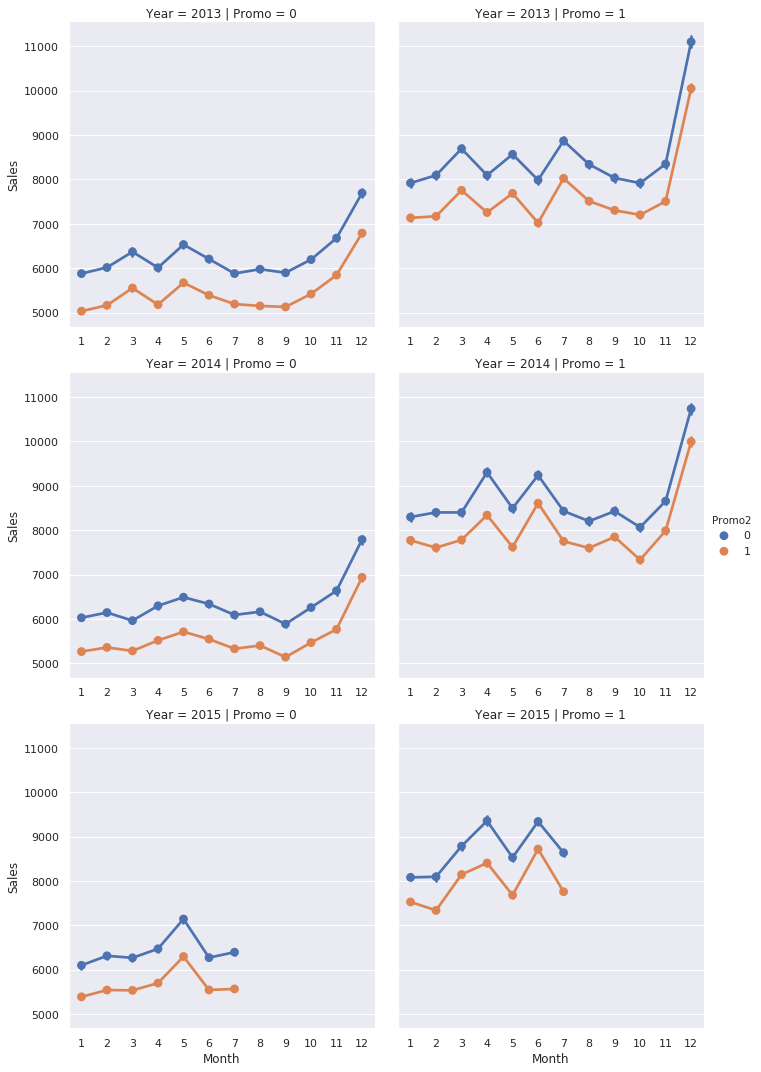

In [13]:
sns.factorplot(data=data, x="Month", y="Sales", col='Promo',
               hue='Promo2', row="Year", sharex=False)

In [14]:
# number of promotions :
pct_promo_change = data[data.Promo == 1].groupby(
    ['Year', 'Month'])['Promo'].count().pct_change()

Text(0.5,1,'Sales per month and Percentage Change in Promotions')

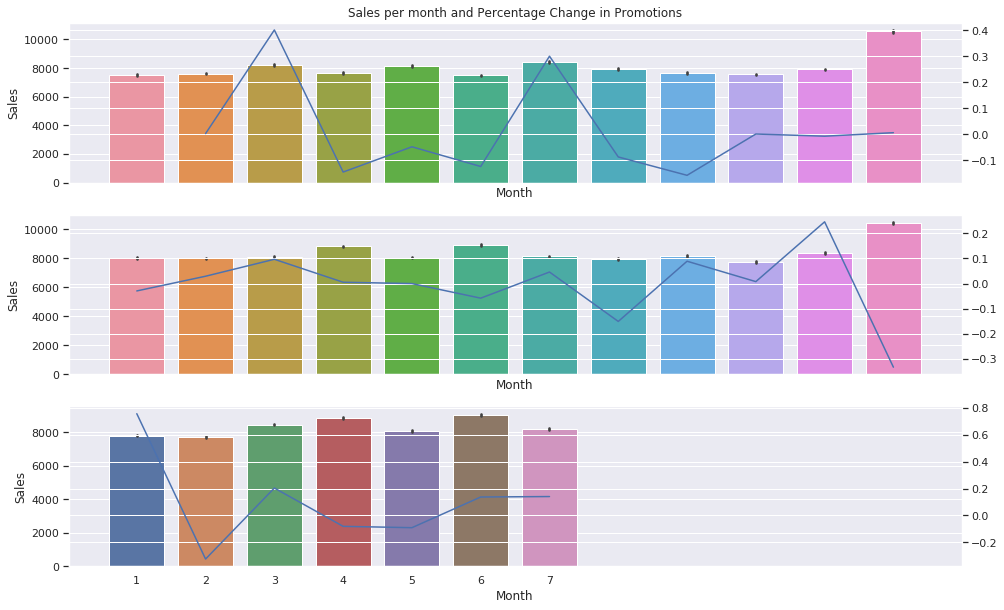

In [15]:
fig, (axis1, axis2, axis3) = plt.subplots(3, 1, sharex=True, figsize=(16, 10))

sns.barplot(x="Month", y="Sales", data=data[(
    data["Promo"] == 1) & (data.Year == 2013)], ax=axis1)
axis11 = axis1.twinx()
axis11.plot(pct_promo_change[2013].values)

sns.barplot(x="Month", y="Sales", data=data[(
    data["Promo"] == 1) & (data.Year == 2014)], ax=axis2)
axis12 = axis2.twinx()
axis12.plot(pct_promo_change[2014].values)

sns.barplot(x="Month", y="Sales", data=data[(
    data["Promo"] == 1) & (data.Year == 2015)], ax=axis3)
axis13 = axis3.twinx()
axis13.plot(pct_promo_change[2015].values)
axis1.set_title('Sales per month and Percentage Change in Promotions')

* Having promotions in a given month increases the store's amount of sales considerably.
* When we check more granularly at the Promo2 variable (indicating a contunious promotion) we see that in general when there is no consecutive promotion stores tend to sell more then with consecutive promotion. This is probably a solution they're putting in place to treat stores with very low sales in the first place. 
* In general, when we have higher percentage change in promotion, we have higher sales comparing to the previous month.
* An interesting observation is that there is a stability in sales (considered low) in January, 2014 and there were no promotions subsequent to these drop in numbers which clearly suggests that the management were unable to predict this drop in numbers. If they had predicted the drop they would have organised more promotions to lure in the customers. This is evident from the January, 2015 , where they have organised more promotions learning from their mistakes from 2014. Subsequently, there appears to be more sales.


### Correlation :

In [16]:
df_correlation = data[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
                       'SchoolHoliday',
                       'CompetitionDistance', 'CompetitionOpenSinceMonth',
                       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
                       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year']]

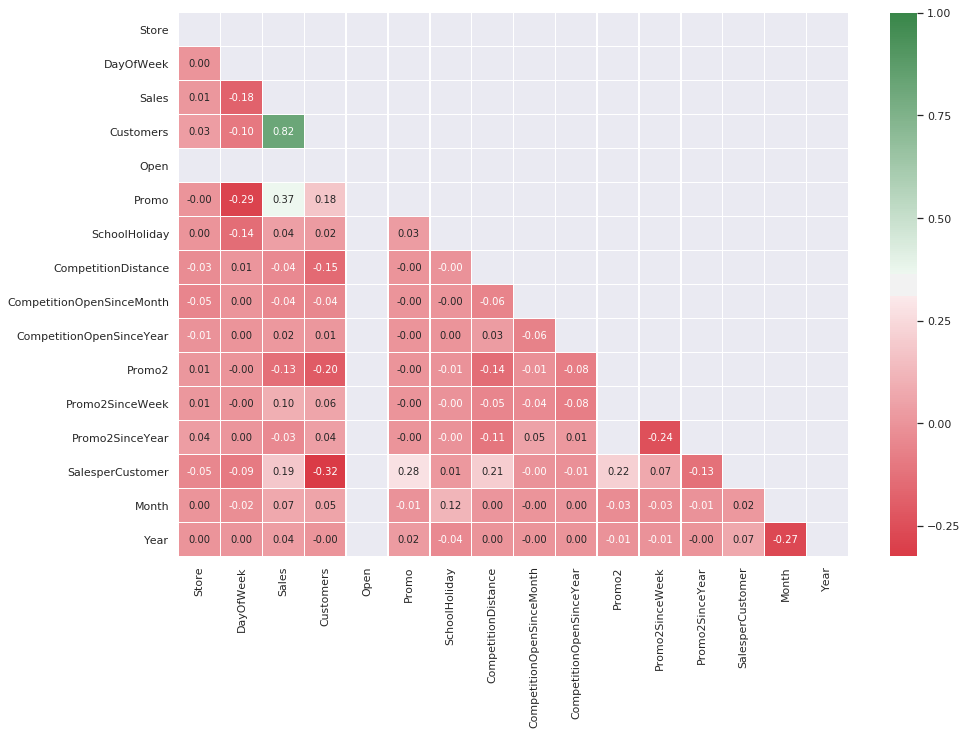

In [17]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype=np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_correlation.corr(), ax=ax, mask=upper_triangle, annot=True,
            fmt='.2f', linewidths=0.5, cmap=sns.diverging_palette(10, 133, as_cmap=True))

### Sales in function of holidays :

In [18]:
train = train[train['Open'] == 1]

In [19]:
train[train['SchoolHoliday'] == 1].shape

(163457, 9)

In [20]:
sns.set(font_scale=1.0)

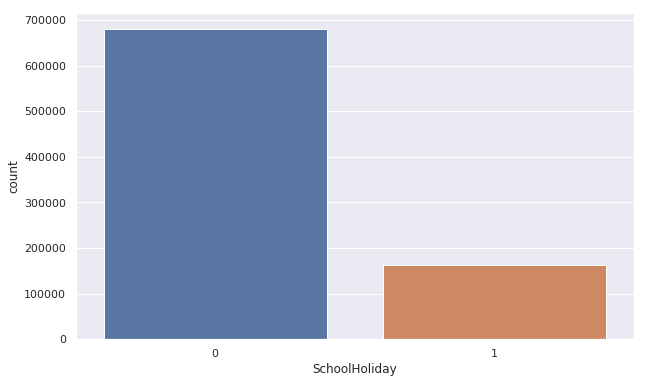

In [21]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x='SchoolHoliday', data=train)

In [22]:
sales_school_holidays = pd.DataFrame(train.groupby(
    'SchoolHoliday')['Sales'].sum()).reset_index()

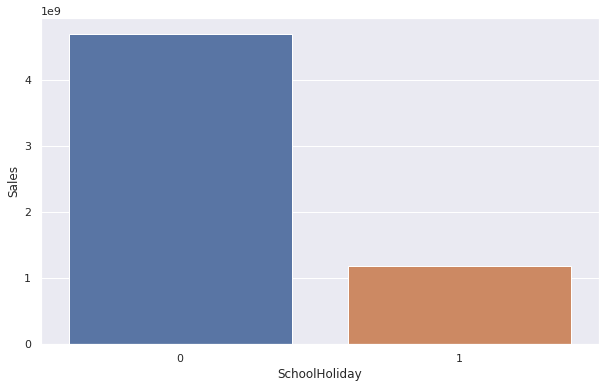

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="SchoolHoliday", y="Sales", data=sales_school_holidays)

* On one hand, we notice that the school holidays, while the stores are open, represent 19.35% of the days.  
* On the other hand, we notice that, on school holidays, when they are open, the stores realise 25.06% of the total sales.

$\rightarrow$ Therefore, there is no need, in a business point of view, for the stores to close on school holidays. On the contrary, they should be open as they can gain more (in terms of pourcentage).

In [24]:
sales_school_holidays

,SchoolHoliday,Sales
0,0,4696260531
1,1,1176920092


In [25]:
1176920092/4696260531

0.25060792182017044

In [26]:
train.StateHoliday.replace([0, '0'], ['O', 'O'], inplace=True)

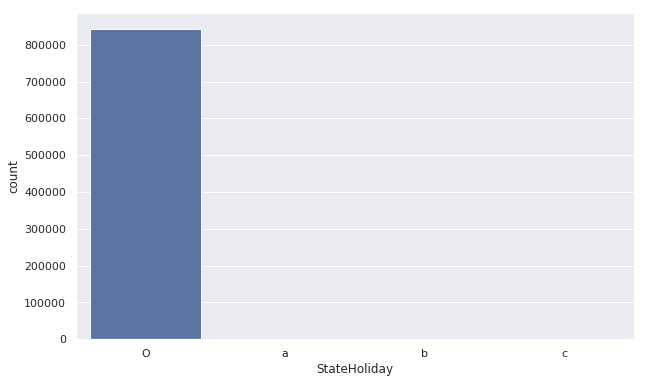

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='StateHoliday', data=train)

$\rightarrow$ On state holidays, the stores are almost always close, so there is no need to keep this feature and take it into consideration.

### Effect of the week's days 

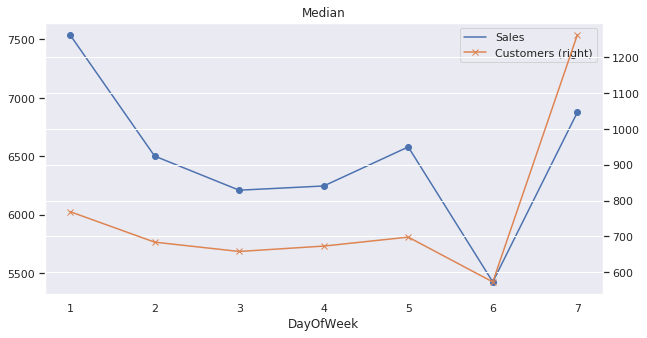

In [28]:
# group sales/customer data by weekday
day = train[(train['Open'] != 0)]
sales_day = day.groupby('DayOfWeek')['Sales'].median()
cust_day = day.groupby('DayOfWeek')['Customers'].median()
#
fig, (axis1) = plt.subplots(1, 1, sharex=True, figsize=(10, 5))
# plot median sales
ax1 = sales_day.plot(legend=True, ax=axis1, marker='o', title="Median")
ax1.set_xticks(sales_day.index)
tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

The number of customers on day 7 is remarkably higher than the other days. Therefore, we are going to assume that day 7 is sunday.  
We notcie that throughout the week until Friday, less customers are generating more sales. While on sunday, more customers appear but surprisingly generate less sales.  
This can be explained by the fact that on weekends, people tend to go to stores window-shopping.  
$\rightarrow$ One insight would be to target promotions on weekends.

## Preprocessing : 

### Different functions that will be needed :

In [29]:
def display_data_types(df):
    """
    The functions displays the data types of the dataframe.

    :param df: pandas dataframe whose datatypes to be displayed
    """

    display(HTML(tabulate.tabulate(
        [["<b>Data types of df_latest_policy_info "]], tablefmt='html')))
    print(df.dtypes)

# Show the percentage of missing values for each column (We create a function because we will use it repeatedly)


def display_na(df):
    """
    The function displays the percentage of missing values for each column of the dataframe.

    :param df: pandas dataframe whose missing values to be displayed
    """

    display(HTML("<h4>Percentage of missing variables for each feature:"))
    print(df.isnull().sum(axis=0) * 100 / len(df))


def display_values(df):
    cols = df.columns

    for col in cols:
        print('\n Col : ', col, ' \n \n \n ', df[col].unique())

### Store dataset :

In [30]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
display_data_types(store)

Data types of df_latest_policy_info


Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [32]:
display_values(store)


 Col :  Store  
 
 
  [   1    2    3 ... 1113 1114 1115]

 Col :  StoreType  
 
 
  ['c' 'a' 'd' 'b']

 Col :  Assortment  
 
 
  ['a' 'c' 'b']

 Col :  CompetitionDistance  
 
 
  [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.800e+02 5.600

In [33]:
display_na(store)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


### Train Dataset :

In [34]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,O,1
1,2,5,2015-07-31,6064,625,1,1,O,1
2,3,5,2015-07-31,8314,821,1,1,O,1
3,4,5,2015-07-31,13995,1498,1,1,O,1
4,5,5,2015-07-31,4822,559,1,1,O,1


In [35]:
display_data_types(train)

Data types of df_latest_policy_info


Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [36]:
display_values(train)


 Col :  Store  
 
 
  [   1    2    3 ... 1115  876  292]

 Col :  DayOfWeek  
 
 
  [5 4 3 2 1 7 6]

 Col :  Date  
 
 
  ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '201

In [37]:
display_na(train)

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


#### a.  Dealing with missing values :

In [38]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

##### a.1  Dealing with CompetitionDistance nan values :

In [39]:
CompetionDistance_null = store[pd.isnull(store.CompetitionDistance)]

In [40]:
CompetionDistance_null.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


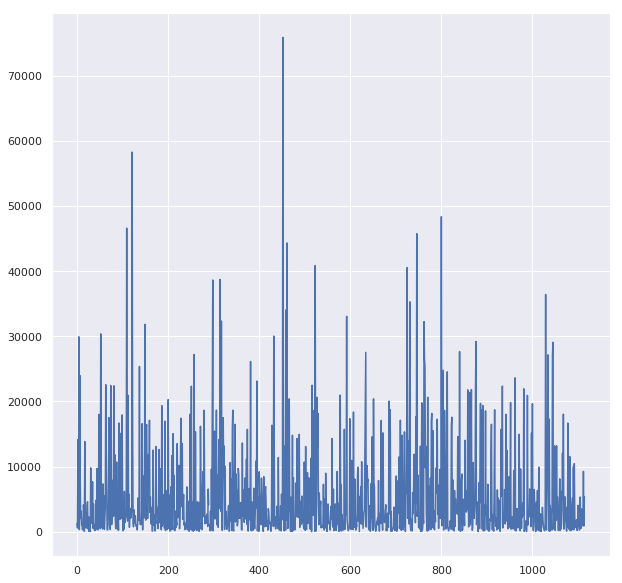

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(store['CompetitionDistance'])

the median is 2325.0 and mean is 5404.901079136691


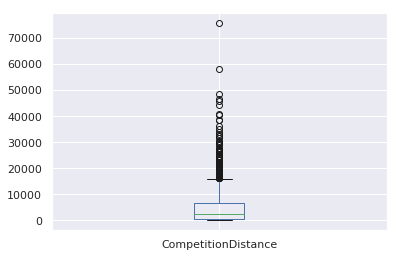

In [42]:
# Let's check the outliers to see if we're going for the mean or the median or different quantiles :
store.CompetitionDistance.plot.box()
print("the median is", store.CompetitionDistance.median(),
      "and mean is", store.CompetitionDistance.mean())

In this case, there is no obvious pattern observed. We will replace the missing values with the first quantile.

The mean is a really bad choice here, because of the outliers. 

In [43]:
# fill NaN with a median value
store['CompetitionDistance'].fillna(
    store['CompetitionDistance'].quantile(), inplace=True)

##### a.2 Dealing with CompetitionOpenSinceMonth and CompetitionOpenSinceYear NaN values :

In this case, I guess that we have missing values because maybe the store had no competition at that time.<br>
Plus, since we have no information about this, we can not do anything about it. <br>
An approach would be to do some semi-supervised learning such that TSVM or $S^{3}VM$ but this will take too much time, so, we decided to replace missing values by zeros. 

In [44]:
store["CompetitionOpenSinceMonth"].fillna(0, inplace=True)
store["CompetitionOpenSinceYear"].fillna(0, inplace=True)

##### a.3 Dealing with Promo2SinceWeek, Promo2SinceYear and PromoInterval NaN values :

In [45]:
store_no_promo = store[store['Promo2'] == 0]

In [46]:
store_no_promo.shape

(544, 10)

In [47]:
store_no_promo.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [48]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

As we see here, those date have NaN values because we had no promotion on that store, for that period of time. <br>
So, We will replace the NaN values by simply a zero. 

In [49]:
store["Promo2SinceWeek"].fillna(0, inplace=True)
store["Promo2SinceYear"].fillna(0, inplace=True)
store["PromoInterval"].fillna(0, inplace=True)

We have dealt with all the missing values :

In [50]:
display_na(store)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64


#### b.  Check if some variables could be considered as categorical variables :

For this matter, we will define some functions : 

In [51]:
def to_categorical(df, cols):

    dict_unique = {}

    for i in cols:
        if(pd.unique(df[i]).shape[0] < 5):
            dict_unique[i] = pd.unique(df[i]).shape[0]

    return dict_unique

##### Store Dataset :

In [52]:
display_data_types(store)

Data types of df_latest_policy_info


Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [53]:
g = store.columns.to_series().groupby(store.dtypes).groups

# int column:
int_col = list(g.values())[0].tolist()

# float column:
float_col = list(g.values())[1].tolist()

# object column:
obj_col = list(g.values())[2].tolist()

In [54]:
# Finding categorical variables among int columns :

dict_unique_int = to_categorical(store, int_col)
dict_unique_int

{'Promo2': 2}

Promo2 is already one-hot encoded, so no need to do any kind of processing. 

In [55]:
# Finding categorical variables among float columns :

dict_unique_float = to_categorical(store, float_col)
dict_unique_float

{}

In [56]:
# Finding categorical variables among object columns :

dict_unique_object = to_categorical(store, obj_col)
dict_unique_object

{'StoreType': 4, 'Assortment': 3, 'PromoInterval': 4}

##### Train Dataset :

In [57]:
display_data_types(train)

Data types of df_latest_policy_info


Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [58]:
f = train.columns.to_series().groupby(train.dtypes).groups

# int column:
int_col = list(f.values())[0].tolist()

# object column:
obj_col = list(f.values())[1].tolist()

In [59]:
# Finding categorical variables among int columns :

dict_unique_int = to_categorical(train, int_col)
dict_unique_int

{'Open': 1, 'Promo': 2, 'SchoolHoliday': 2}

In [60]:
# Finding categorical variables among object columns :

dict_unique_object = to_categorical(train, obj_col)
dict_unique_object

{'StateHoliday': 4}